In [1]:
import pandas_datareader.data as web

In [2]:
import datetime 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd

In [3]:
start=datetime.datetime(2020,1,1)

In [4]:
end=datetime.datetime(2020,12,31)

In [5]:
Nifty = web.DataReader("^NSEI", 'yahoo',start,end)

In [6]:
Nifty.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-01,12222.200195,12165.299805,12202.150391,12182.500000,304100.0,12182.500000
2020-01-02,12289.900391,12195.250000,12198.549805,12282.200195,407700.0,12282.200195
2020-01-03,12265.599609,12191.349609,12261.099609,12226.650391,428800.0,12226.650391
2020-01-06,12179.099609,11974.200195,12170.599609,11993.049805,396500.0,11993.049805
2020-01-07,12152.150391,12005.349609,12079.099609,12052.950195,447800.0,12052.950195


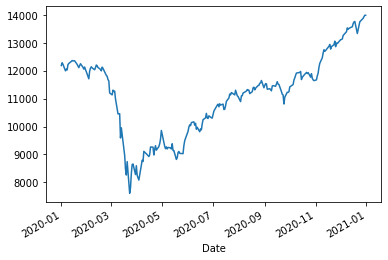

In [7]:
Nifty['Adj Close'].plot(label="Nifty 50")
plt.show()

In [8]:
BankNifty = web.DataReader("^NSEBANK", 'yahoo',start,end)

In [9]:
BankNifty.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,32465.449219,32121.400391,32133.150391,32443.849609,253600.0,32443.849609
2020-01-03,32329.800781,31960.400391,32326.949219,32069.250000,217600.0,32069.250000
2020-01-06,31914.449219,31170.550781,31910.449219,31237.150391,256200.0,31237.150391
2020-01-07,31851.449219,31200.900391,31598.050781,31399.400391,294400.0,31399.400391
2020-01-08,31451.849609,30899.550781,30995.500000,31373.650391,304500.0,31373.650391


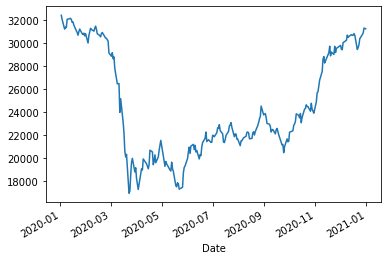

In [10]:
BankNifty['Adj Close'].plot(label="Bank Nifty")
plt.show()

In [11]:
SP500 = web.DataReader("^GSPC", 'yahoo',start,end)
SP500.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,3231.719971,3212.030029,3215.179932,3230.780029,2893810000,3230.780029
2020-01-02,3258.139893,3235.530029,3244.669922,3257.850098,3458250000,3257.850098
2020-01-03,3246.149902,3222.340088,3226.360107,3234.850098,3461290000,3234.850098
2020-01-06,3246.840088,3214.639893,3217.550049,3246.280029,3674070000,3246.280029
2020-01-07,3244.909912,3232.429932,3241.860107,3237.179932,3420380000,3237.179932


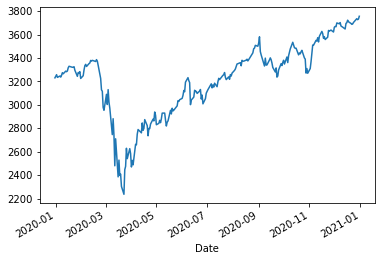

In [12]:
SP500['Adj Close'].plot(label="S&P 500")
plt.show()

In [13]:
Nasdaq = web.DataReader("^IXIC", 'yahoo',start,end)
Nasdaq.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,8975.360352,8912.769531,8918.740234,8972.599609,2182800000,8972.599609
2020-01-02,9093.429688,9010.889648,9039.459961,9092.190430,2848370000,9092.190430
2020-01-03,9065.759766,8976.429688,8976.429688,9020.769531,2567400000,9020.769531
2020-01-06,9072.410156,8943.500000,8943.500000,9071.469727,2788120000,9071.469727
2020-01-07,9091.929688,9042.549805,9076.639648,9068.580078,2352850000,9068.580078


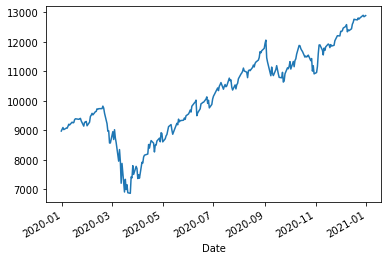

In [14]:
Nasdaq['Adj Close'].plot(label="Nasdaq")
plt.show()

In [15]:
def Supertrend(data):
    data=data.reset_index(drop=True)
    
    data['tr0'] = abs(data["High"] - data["Low"])
    data['tr1'] = abs(data["High"] - data["Close"].shift(1))
    data['tr2'] = abs(data["Low"]- data["Close"].shift(1))
    data["TR"] = round(data[['tr0', 'tr1', 'tr2']].max(axis=1),2)
    data["ATR"]=0.00
    data['BUB']=0.00
    data["BLB"]=0.00
    data["FUB"]=0.00
    data["FLB"]=0.00
    data["ST"]=0.00
    
    
    for i, row in data.iterrows():
        if i == 0:
            data.loc[i,'ATR'] = 0.00#data['ATR'].iat[0]
        else:
            data.loc[i,'ATR'] = ((data.loc[i-1,'ATR'] * 13)+data.loc[i,'TR'])/14

    data['BUB'] = round(((data["High"] + data["Low"]) / 2) + (2 * data["ATR"]),2)
    data['BLB'] = round(((data["High"] + data["Low"]) / 2) - (2 * data["ATR"]),2)
    

    for i, row in data.iterrows():
        if i==0:
            data.loc[i,"FUB"]=0.00
        else:
            if (data.loc[i,"BUB"]<data.loc[i-1,"FUB"])|(data.loc[i-1,"Close"]>data.loc[i-1,"FUB"]):
                data.loc[i,"FUB"]=data.loc[i,"BUB"]
            else:
                data.loc[i,"FUB"]=data.loc[i-1,"FUB"]

    
   
    for i, row in data.iterrows():
        if i==0:
            data.loc[i,"FLB"]=0.00
        else:
            if (data.loc[i,"BLB"]>data.loc[i-1,"FLB"])|(data.loc[i-1,"Close"]<data.loc[i-1,"FLB"]):
                data.loc[i,"FLB"]=data.loc[i,"BLB"]
            else:
                data.loc[i,"FLB"]=data.loc[i-1,"FLB"]
            
            
            
    for i, row in data.iterrows():
        if i==0:
            data.loc[i,"ST"]=0.00
        elif (data.loc[i-1,"ST"]==data.loc[i-1,"FUB"]) & (data.loc[i,"Close"]<=data.loc[i,"FUB"]):
            data.loc[i,"ST"]=data.loc[i,"FUB"]
        elif (data.loc[i-1,"ST"]==data.loc[i-1,"FUB"])&(data.loc[i,"Close"]>data.loc[i,"FUB"]):
            data.loc[i,"ST"]=data.loc[i,"FLB"]
        elif (data.loc[i-1,"ST"]==data.loc[i-1,"FLB"])&(data.loc[i,"Close"]>=data.loc[i,"FLB"]):
            data.loc[i,"ST"]=data.loc[i,"FLB"]
        elif (data.loc[i-1,"ST"]==data.loc[i-1,"FLB"])&(data.loc[i,"Close"]<data.loc[i,"FLB"]):
            data.loc[i,"ST"]=data.loc[i,"FUB"]
        
    
    # Buy Sell Indicator
    for i, row in data.iterrows():
        if i==0:
            data["ST_BUY_SELL"]="NA"
        elif (data.loc[i,"ST"]<data.loc[i,"Close"]) :
            data.loc[i,"ST_BUY_SELL"]="BUY"
        else:
            data.loc[i,"ST_BUY_SELL"]="SELL"
    
    
    
    def buy_sell(signal):
        buy = []
        sell = []
        flag = -1

        for i in range(0,len(signal)):
            if signal['MACD'][i] > signal['Signal'][i]:
                sell.append(np.nan)
                if flag != 1:
                    buy.append(signal['Close'][i])
                    flag = 1
                else:
                    buy.append(np.nan)

            elif signal['MACD'][i] < signal['Signal'][i]:
                buy.append(np.nan)
                if flag != 0:
                    sell.append(signal['Close'][i])
                    flag = 0
                else:
                    sell.append(np.nan)

            else:
                buy.append(np.nan)
                sell.append(np.nan)    

        return(buy,sell)       
    
    return data

In [25]:
Nifty_Supertrend = Supertrend(Nifty)
Nifty_Supertrend.head()

,High,Low,Open,Close,Volume,Adj Close,tr0,tr1,tr2,TR,ATR,BUB,BLB,FUB,FLB,ST,ST_BUY_SELL
0,12222.200195,12165.299805,12202.150391,12182.500000,304100.0,12182.500000,56.900391,NaN,NaN,56.90,0.000000,12193.75,12193.75,0.00,0.00,0.00,NA
1,12289.900391,12195.250000,12198.549805,12282.200195,407700.0,12282.200195,94.650391,107.400391,12.750000,107.40,7.671429,12257.92,12227.23,12257.92,12227.23,12227.23,BUY
2,12265.599609,12191.349609,12261.099609,12226.650391,428800.0,12226.650391,74.250000,16.600586,90.850586,90.85,13.612755,12255.70,12201.25,12255.70,12227.23,12255.70,SELL
3,12179.099609,11974.200195,12170.599609,11993.049805,396500.0,11993.049805,204.899414,47.550781,252.450195,252.45,30.672558,12138.00,12015.30,12138.00,12015.30,12138.00,SELL
4,12152.150391,12005.349609,12079.099609,12052.950195,447800.0,12052.950195,146.800781,159.100586,12.299805,159.10,39.845947,12158.44,11999.06,12138.00,11999.06,12138.00,SELL


In [17]:
BankNifty_Supertrend = Supertrend(BankNifty)

In [18]:
SP500_Supertrend= Supertrend(SP500)

In [19]:
Nasdaq_Supertrend= Supertrend(Nasdaq)

In [30]:
def PL_Cal(data):
    print("Profit for a holding stock for a year:"+ str((data.iloc[-1]["Adj Close"])-(data.iloc[0]["Adj Close"])) )
    
    state_idle = False
    net_value = 0
    start_value = data.iloc[0]['Open']
    end_value = start_value
    
    for i in range(1, len(data)):
    #     print(data.iloc[i]['Open'], data.iloc[i]['ST_BUY_SELL'])

        prev_state = data.iloc[i-1]['ST_BUY_SELL']
        curr_state = data.iloc[i]['ST_BUY_SELL']


        if(prev_state != curr_state):
            state_idle = False
        else:
            state_idle = True

        if( not state_idle):
            if(curr_state == 'BUY'):
                start_value = data.iloc[i]['Open']
            else:
                end_value = data.iloc[i]['Open']
                net_value += end_value-start_value
    #     print(str(start_value) + "----->" +str(end_value))
    #     print("Net_value ="+ str(net_value))
    #     print("-------------------")


    print("Profit for a year plying with Supertrend:"+ str(net_value))

In [31]:
PL_Cal(Nifty_Supertrend)

Profit for a holding stock for a year:1799.25
Profit for a year plying with Supertrend:4761.7490234375


In [32]:
PL_Cal(BankNifty_Supertrend)

Profit for a holding stock for a year:-1179.798828125
Profit for a year plying with Supertrend:11732.953125


In [33]:
PL_Cal(SP500_Supertrend)

Profit for a holding stock for a year:525.2900390625
Profit for a year plying with Supertrend:1051.08984375


In [34]:
PL_Cal(Nasdaq_Supertrend)

Profit for a holding stock for a year:3915.6806640625
Profit for a year plying with Supertrend:3994.11962890625
